In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Exploratory Data Analysis

In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df['Salary'].skew()

0.35411967922959153

C:\Users\KP\mambaforge\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


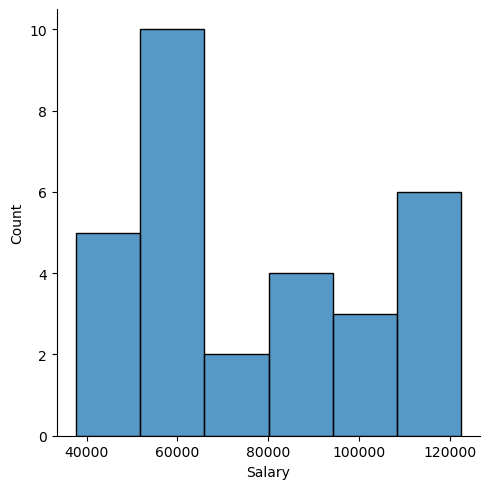

In [10]:
sns.displot(x=df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

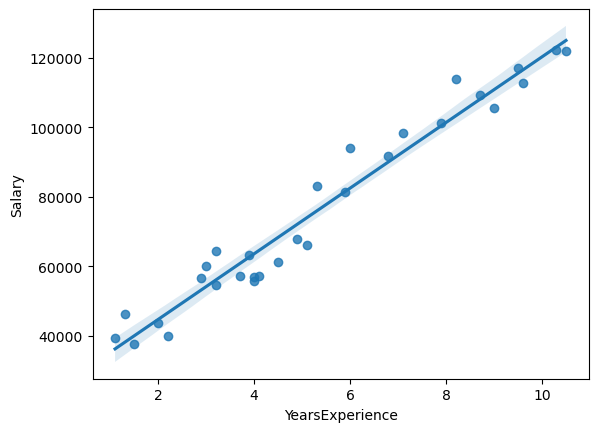

In [11]:
sns.regplot(x="YearsExperience", y="Salary", data=df)

<Axes: >

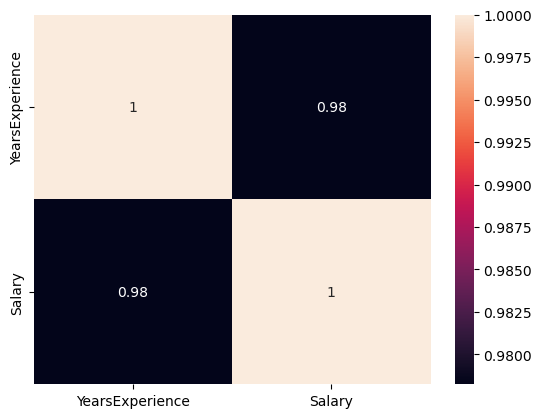

In [12]:
sns.heatmap(df.corr(), annot=True)

## Linear Regression Model

In [13]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import joblib
from math import sqrt
import random

In [14]:
X = df['YearsExperience']
y = df['Salary']

In [15]:
##### Splitting the data into train and test randomly
seed = random.randint(1000,10000)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=seed)

In [16]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [17]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [18]:
X_test = X_test.values.reshape(-1,1)

In [19]:
pred = model_fit.predict(X_test)

In [20]:
df_pred = pd.DataFrame(pred,columns = ['Pred'])

In [21]:
df_pred['Actual'] = y_test.values

In [22]:
print("The strength of the Model is :", r2_score(df_pred['Actual'],df_pred['Pred']))

The strength of the Model is : 0.9883441536627084


In [23]:
print("Root Mean Square error is: ", sqrt(mean_squared_error(df_pred['Actual'],df_pred['Pred'])))

Root Mean Square error is:  3006.019415616572


In [24]:
a = float(model_fit.coef_[0,0])
b = model_fit.intercept_[0]

In [25]:
print("Coefficient  : ", np.round(a, 4))
print("Intercept : ", np.round(b, 4))

Coefficient  :  9398.0733
Intercept :  25977.4384


In [26]:
filename = 'salary.sav'
joblib.dump(model_fit,filename)

['salary.sav']

## Predition

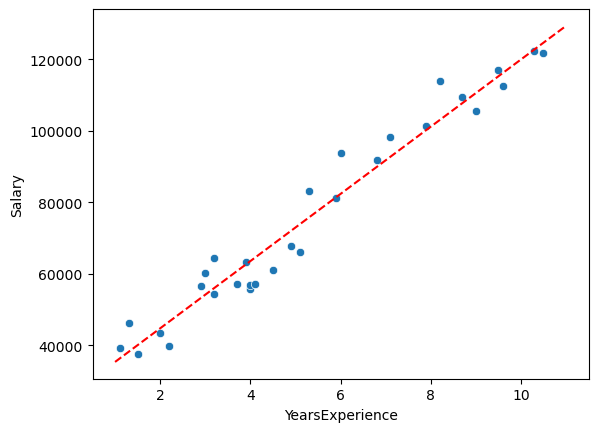

In [27]:
X_plot = np.linspace(1, 11, 100)
Y_plot = a*X_plot+b
plt.subplot()
sns.scatterplot(x="YearsExperience", y="Salary", data=df)
sns.lineplot(x=X_plot, y=Y_plot, linestyle='--', color='r')
plt.show()

In [29]:
new_data=pd.DataFrame([4,9.5], columns=['sorting_time'])
new_data

,sorting_time
0,4.0
1,9.5


In [30]:
model_fit.predict(new_data)

C:\Users\KP\mambaforge\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 63569.73141487],
       [115259.13432111]])